<div class= "alert alert-info">
<h1><center><font color='Darkblue'>Support Vector Machine Regressor</font>

# <font color='#FF33A1'>Support Vector Machine (SVM) in Regression (SVR)</font>

        Support Vector Machine (SVM) is widely known for classification problems ,but it can also be used for regression tasks.The regression version of SVM is called Support Vector Regression(SVR)

# <font color='#000080'> What is Support Vector Regression (SVR)?</font>

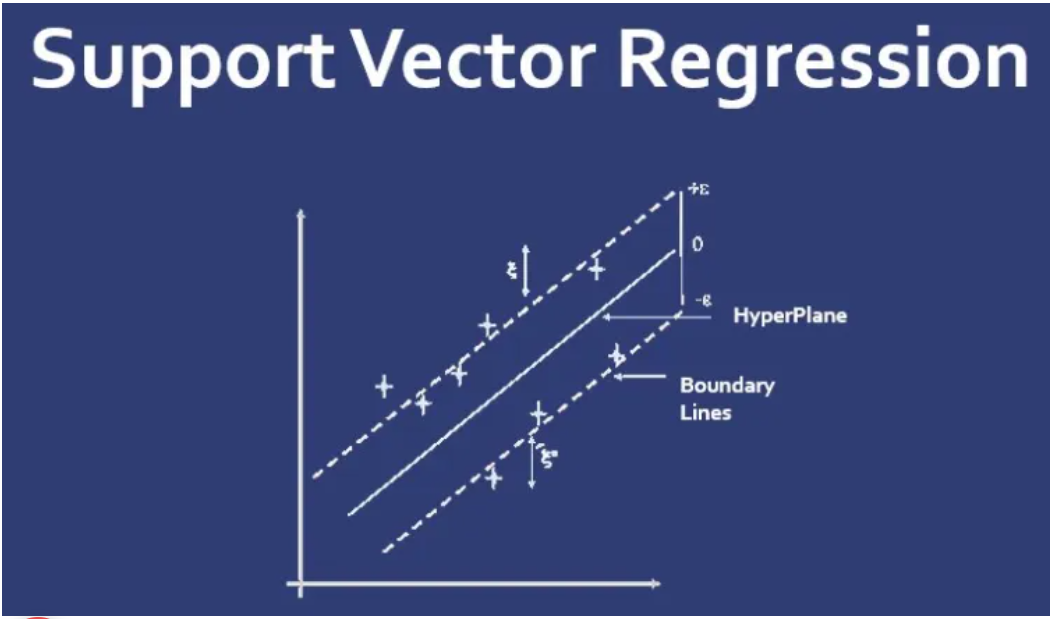

In [2]:
from PIL import Image
Image.open('s22.png')

 # <font color='darkblue'> SVM Classification<font>

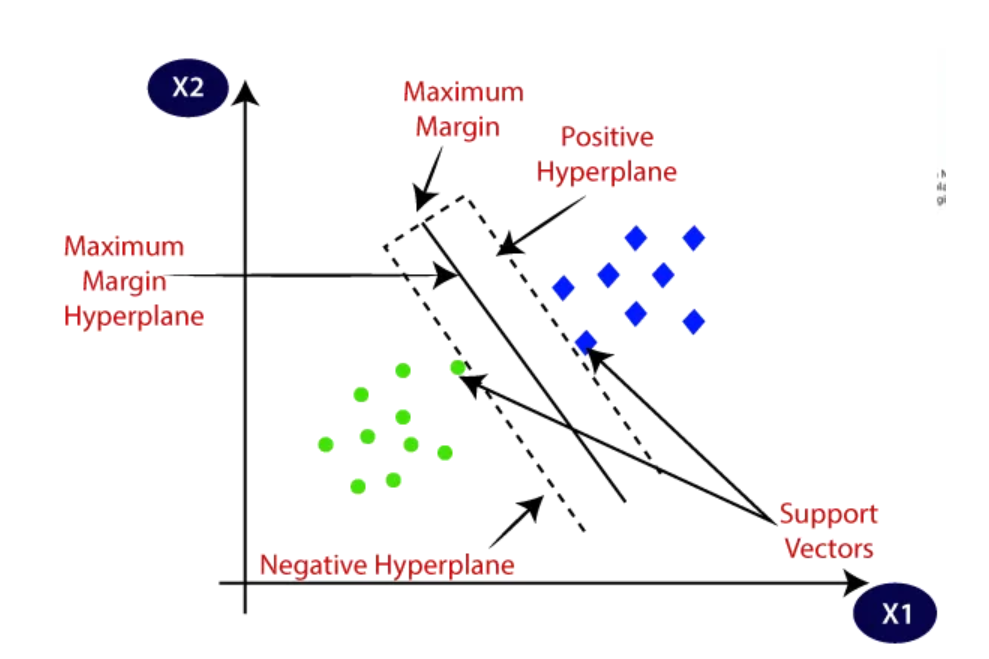

In [4]:
Image.open('s21.png')

        Support Vector Machines,often to as SVMs,are versatile machine learning algorithms that excel in both classification and regression tasks.In regression,SVMs are used to predict continuous numerical values,making them a valueble tool for various applications ,from stock price forecasting to medical data analysis.

        Support Vector Regression(SVR) is a type of regression algorithm that uses support vectors to predict continuous values.Unlike traditional regression models that minimizes the error directly .SVR tries to fit the best fit line(or hyperplane) within a margin of tolerence (ε-insensitive zone).

        
       1. Instead of minimizing the error between predicted and actual values, SVR finds a function that allows a maximum number of points within a margin (ε-tube).

        
       2. The model focuses on only a subset of training data points(which are outside the margin), called support vectors, which define the regression function.


# <font color="#008080">Understanding SVM Regression<font>
        At its core, SVM regression aims to find the optimal hyperplane that best fits the data while minimizing prediction errors. This hyperplane is positioned to have a “margin” on both sides, which represents the acceptable prediction error. The data points closest to this margin are known as support vectors, hence the name “Support Vector Machine.”

# Explanation

## <font color='green'>1.Optimal Hyperplane<font>
        This is the main decision boundary that seperates the two classes of data points.The goal of SVM is to find the hyperplane that maximizes the margin between two classes.

## <font color='green'>2.Margin:<font>
        The margin is the distance between the optimal hyperplane and the nearest data points from both classes.These nearest points are known as "Support Vectors".
        The margin is crucial because it helps create a robust classifier that can generalize well to new data points.



# <font color='green'> Key Concepts of SVR<font>

## <font color='pale pink'>a.Epsilon-Insensitive Loss(ε-Tube)<font>
        1.Unlike standard regression, where we minimize the mean squared error, SVR allows for some tolerance (ε).
        
        2.Predictions that fall within the ε margin are not penalized.
        
        
        3.Only points outside this margin(suppoer vectors or error) contribute to the loss function.

       
        




              *
                 *        *
      ------------------------  <- Upper margin (ε)
        *     SVR Line   *
      ------------------------  <- Lower margin (-ε)

         *       * 

         ✅ Points inside the margin → Used in predictions, but ignored during training.
        ✅ Points outside the margin → Used in both training and predictions.
        ✅ The ε-margin only affects how the model learns, not how it predicts.
    


## 🔹 Example to Understand How SVR Works
        Consider a dataset where we predict house prices based on square footage.
        
        Suppose ε = 5,000
        If a house’s actual price is $200,000 and the model predicts $198,000, the difference is $2,000, which is within the ε-margin. So, no penalty is applied.
        If another house’s actual price is $250,000, and the model predicts $240,000, the difference is $10,000, which is outside the ε-margin. So, this point is penalized and used in training.

        1.SVR ignores small errors (inside ε-margin) during training, but it still uses all data points for predictions.
        2.Support vectors (points outside the margin) define the regression line.
        3.SVR predictions are influenced by both support vectors and the model function.

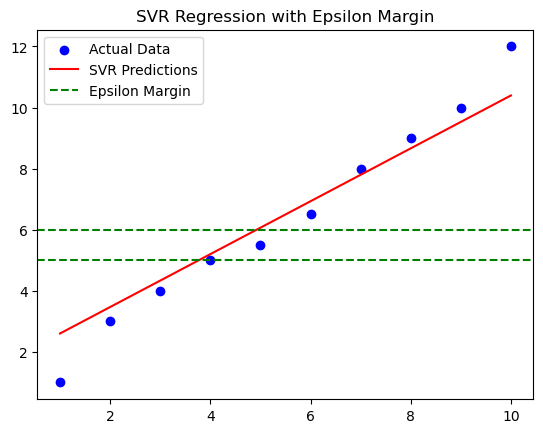

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Sample dataset
X = np.arange(1, 11).reshape(-1, 1)  # Feature
y = np.array([1, 3, 4, 5, 5.5, 6.5, 8, 9, 10,12])  # Target

# Standardizing data
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1, 1)).ravel()

# SVR Model
svr = SVR(kernel='linear', epsilon=0.5)
svr.fit(X_scaled, y_scaled)

# Predictions
y_pred_scaled = svr.predict(X_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Plot
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='SVR Predictions')
plt.title("SVR Regression with Epsilon Margin")
plt.axhline(y=5, color='green', linestyle='--', label='Epsilon Margin')
plt.axhline(y=6, color='green', linestyle='--')
plt.legend()
plt.show()


## <font color='pale pink'>b.Kernal Trick<font>
        1.Similar to classification SVM, SVR can use kernel functions to handle non-linear regression problems by mapping the input features to a higher-dimensional space.

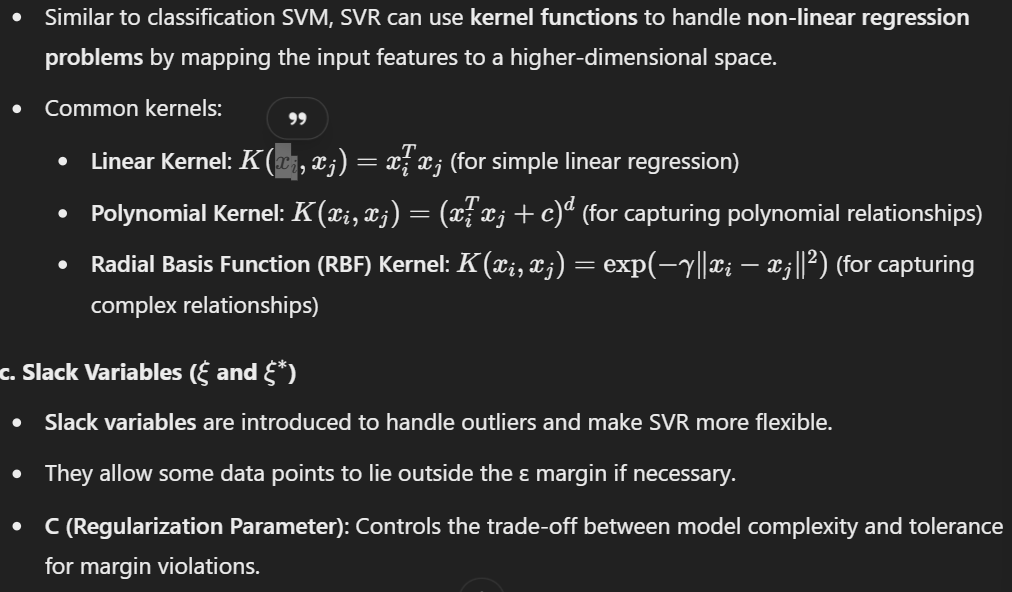

In [7]:
Image.open('s23.png')

# <font color='green'> SVR Objective Function<font>

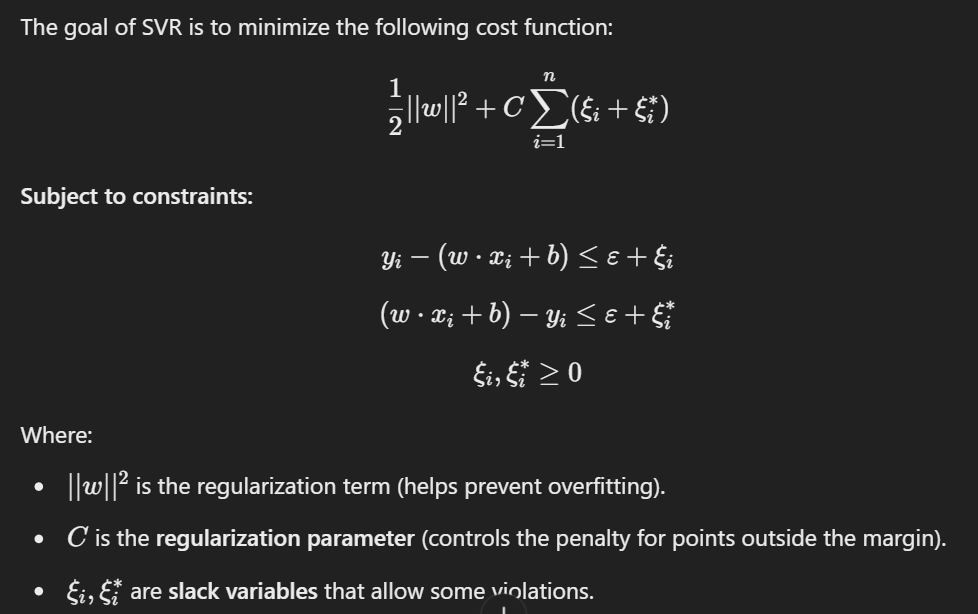

In [8]:
Image.open('s24.png')

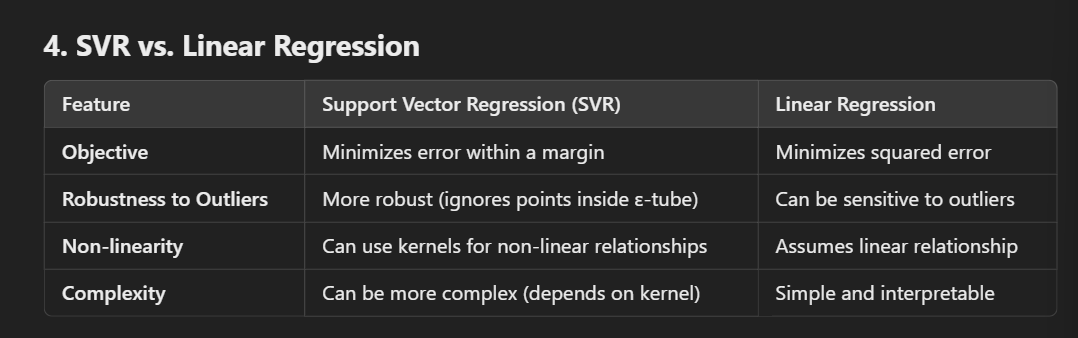

In [9]:
Image.open('s25.png')

# Building Your First SVM Regression Model
        Let’s illustrate SVM regression with a simple example. Imagine we have a dataset containing housing prices based on their square footage. We want to predict the price of a new house based on its size. Here’s how you can do it in Python:

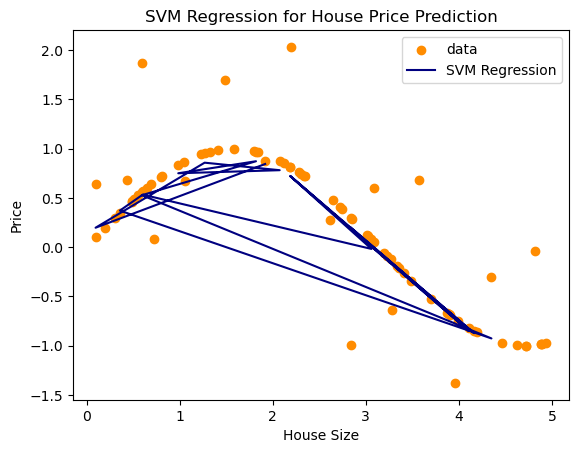

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to the targets
y[::5] += 3 * (0.5 - np.random.rand(16))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create an SVM regression model
svr = SVR(kernel='rbf', C=100,gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Predict on test data
y_pred = svr.predict(X_test)

# Plot the results
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_test, y_pred, color='navy', label='SVM Regression')
plt.xlabel('House Size')
plt.ylabel('Price')
plt.title('SVM Regression for House Price Prediction')
plt.legend()
plt.show()

        In this example, we generated synthetic data, split it into training and testing sets, created an SVM regression model, and made predictions. The resulting plot showcases how the SVM regression model fits the data.

# <font color='green'>Fine-Tuning Your SVM Regression Model<font>
        Creating an Support Vector Machine regression model is just the beginning. To ensure it performs optimally, you need to fine-tune its hyperparameters. The choice of kernel (e.g., linear, polynomial, or radial basis function) and regularization strength (C) can significantly impact model performance.

# <font color='green'>Evaluating Your Model<font>
        To evaluate your Support Vector Machine regression model, you can use metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) to assess its accuracy and goodness of fit.

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.3506801351807138
Mean Squared Error: 0.3483893560640952
R-squared: 0.5273953484147811


        These metrics provide insights into how well your Support Vector Machine regression model is performing and whether it meets your prediction accuracy requirements.

# <font color='green'>Real-Life Applications<font>
        SVM regression has a broad range of real-life applications:

## 1.Stock Market Analysis: 
        Predicting stock prices based on historical data.
## 2.Medical Research: 
        Forecasting patient recovery time based on treatment factors.
## 3.Environmental Science:
        Estimating environmental variables like temperature or pollution levels over time.

In [ ]:
Here We have another Example

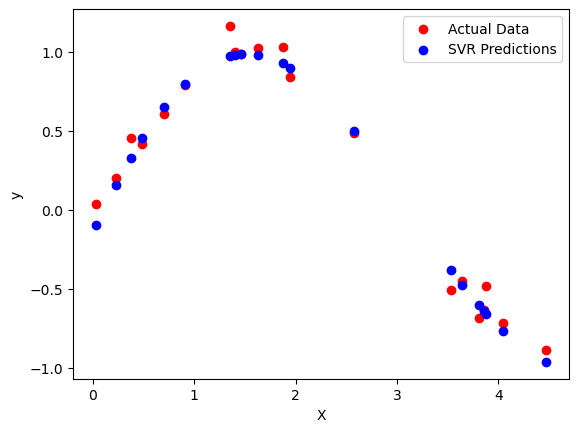

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Generating some non-linear data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Adding some noise

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR Model with RBF Kernel
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train_scaled, y_train)

# Predictions
y_pred = svr_rbf.predict(X_test_scaled)

# Plot the results
plt.scatter(X_test, y_test, color='red', label='Actual Data')
plt.scatter(X_test, y_pred, color='blue', label='SVR Predictions')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.06823541106130915
Mean Squared Error: 0.007620599743344792
R-squared: 0.9841146326604456


# <font color='pale pink'>6. Advantages & Disadvantages of SVR<font>
## Advantages
        ✅ Works well with high-dimensional data
        ✅ Can handle non-linearity using kernel trick
        ✅ Robust to outliers (due to ε-tube concept)
        ✅ Flexibility with different kernels (linear, polynomial, RBF, etc.)

## Disadvantages
        ❌Computationally expensive for large datasets
        ❌ Choosing the right kernel and hyperparameters can be challenging
        ❌ Sensitive to the choice of C, ε, and kernel parameters

# <font color='#FF33A1'>7. When to Use SVR?<font>
        1.When the data is non-linear and a traditional regression model (like linear regression) does not perform well.
        2.When you have a small to medium-sized dataset (SVR can be slow on large datasets).
        3.When you want robustness against outliers (due to the margin concept).

<div class='alert alert-info'>
<h1><center><font color='darkblue'>Implemenatation of SVR</font></center></h1>

In [23]:
# Importing the required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [24]:
#Loading the dataset
df=pd.read_csv('Data.csv')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [25]:
# data preprocessing
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [26]:
# checking for null values
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [27]:
# checking for duplicates
df.duplicated().sum()

41

In [28]:
df=df.drop_duplicates()

In [29]:
df.duplicated().sum()

0

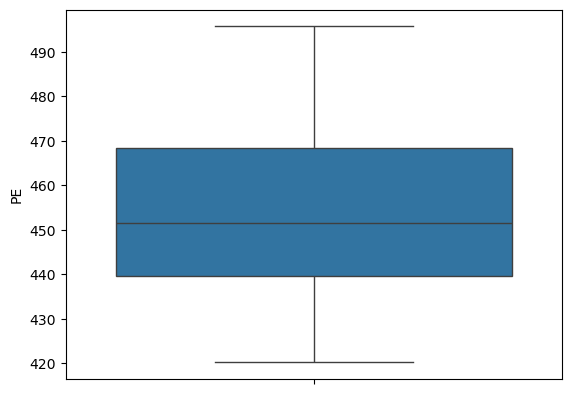

In [30]:
# We don't have any outliers too
sns.boxplot(df['PE'])
plt.show()

In [31]:
# Separating the dataset into Dependent and independent variables
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1:].values

In [32]:
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [33]:
Y

array([[463.26],
       [444.37],
       [488.56],
       ...,
       [429.57],
       [435.74],
       [453.28]])

In [34]:
# splitting the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [35]:
# Scaling the dataset for good accuarcy
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
Y_train=sc.fit_transform(Y_train)

In [36]:
# Model Evaluation
from sklearn.svm import SVR
regressor=SVR(kernel='rbf') # if data is non-linear we should kernal as 'rbf' if not take 'linear' or 'guassian'
regressor.fit(X_train,Y_train)


SVR()

In [37]:
#predicting the values

Y_pred=regressor.predict(X_test)
Y_pred

array([ 1.8633846 ,  0.54987488,  0.30891468, ..., -1.20574501,
       -1.15406925,  1.56655364])

In [41]:
Y_pred=sc.inverse_transform(Y_pred.reshape(-1,1))
Y_pred

array([[486.33701708],
       [463.89461884],
       [459.77761496],
       ...,
       [433.89840355],
       [434.78132658],
       [481.26541488]])

In [42]:
Y_test

array([[488.81],
       [464.41],
       [454.66],
       ...,
       [428.  ],
       [430.5 ],
       [482.31]])

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 3.0901120640292605
Mean Squared Error: 17.18125620925938
R-squared: 0.9393455441900841


In [44]:
Y_test.shape

(1906, 1)

        For Model Improving We have some techniques called 'K-fold' and 'Grid Search'.